In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats


In [2]:
tiktok_data=pd.read_excel('Data cleaning/filtered_data.xlsx')
tiktok_data.head(3)

,authorMeta/fans,authorMeta/heart,authorMeta/name,authorMeta/signature,authorMeta/verified,authorMeta/video,commentCount,diggCount,downloaded,hashtags/0/name,...,playCount,searchHashtag/name,searchHashtag/views,shareCount,text,videoMeta/duration,videoMeta/height,videoMeta/width,mention,bio
0,13200000,150400000,miso_ara,soonent@soon-ent.co.kr\n.\n Miso Ara IG,True,303,66000,19300000,False,woah,...,200600000,meme,556B,377700,Ara Woah #woah #woahchallenge #foryou #fyp...,17,1280,720,0,1
1,1300000,35100000,crinka11,insta: chrisrinker73,False,518,154100,15400000,False,fyp,...,79600000,meme,556B,205400,#fyp #meme #funny #meme #vine,11,1024,576,0,1
2,696800,15900000,iampets_com,"Pet supplies, toys online store. All products ...",False,90,55300,13900000,False,funny,...,106100000,meme,556B,323000,The end #funny #funnyvideos #animals #haha #me...,25,1024,576,0,1


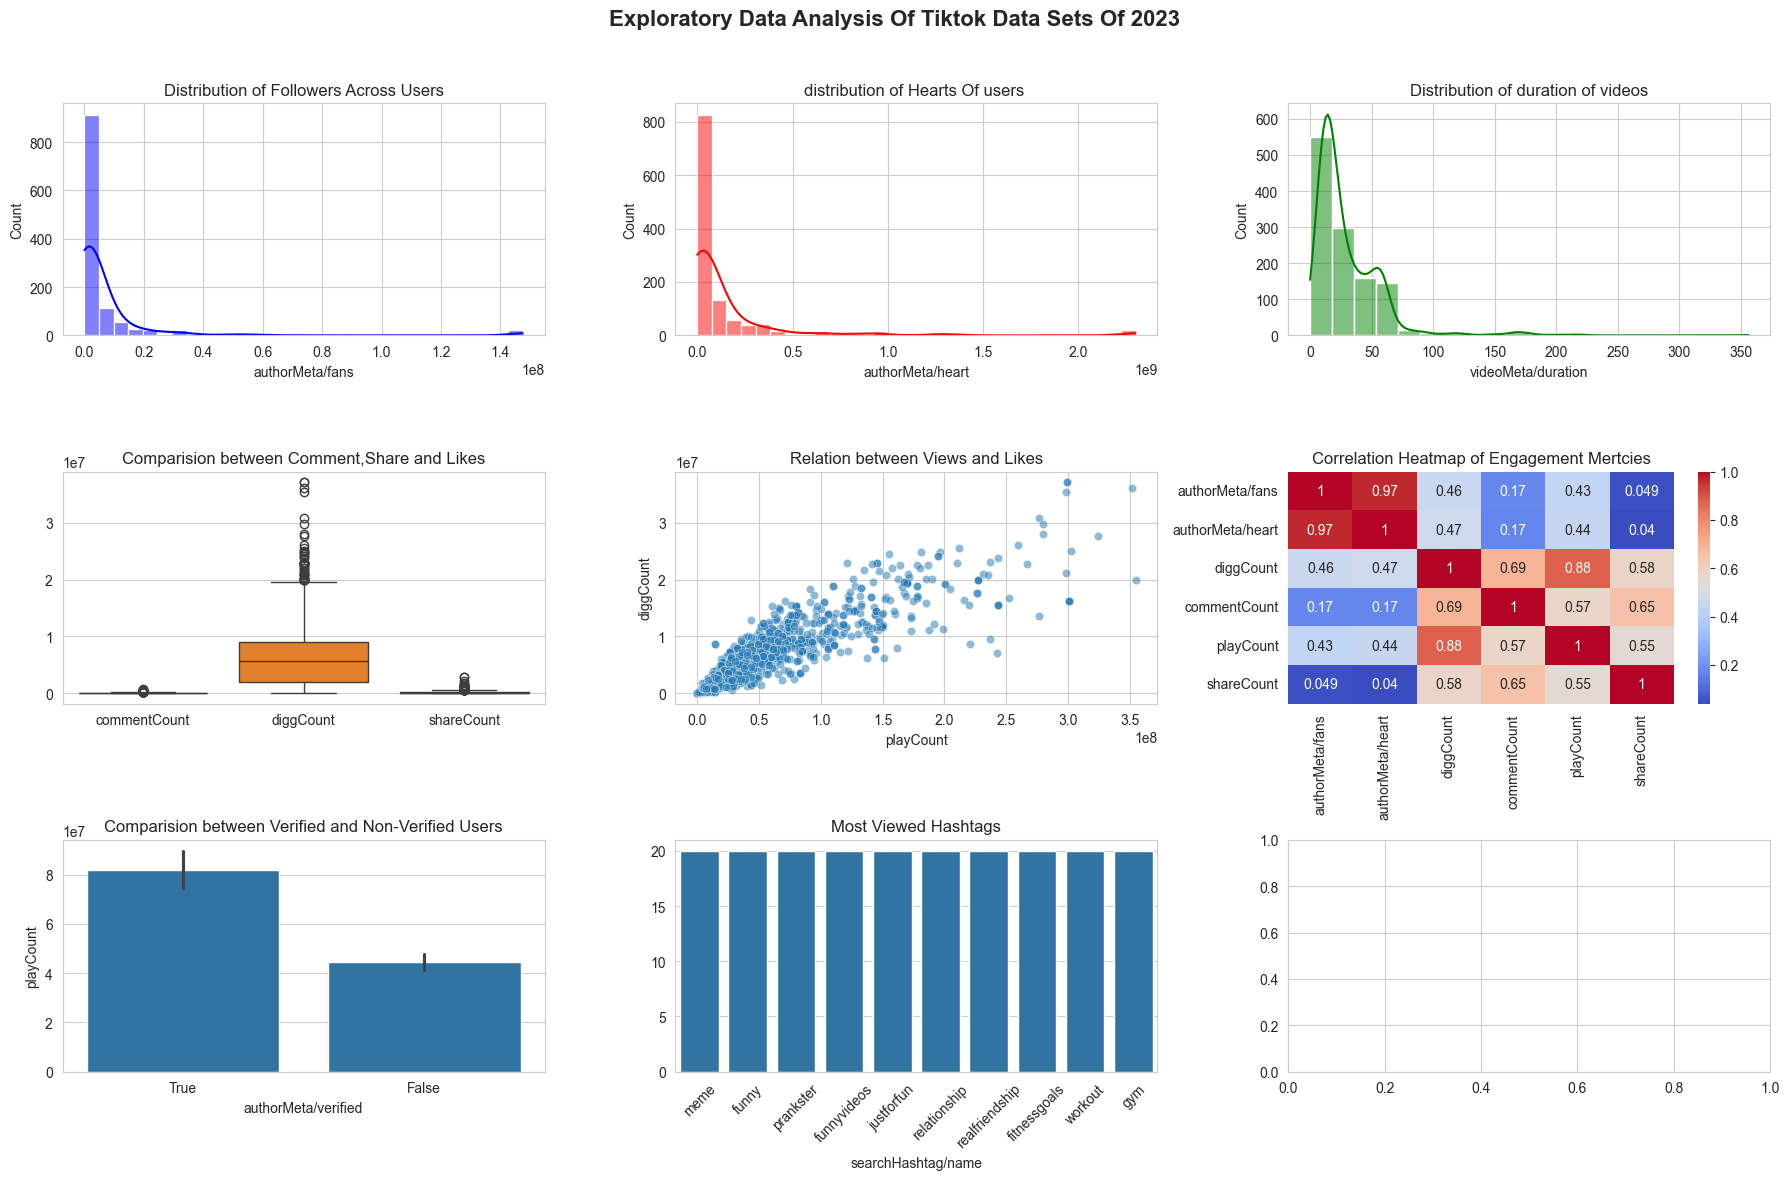

In [3]:
sns.set_style("whitegrid")
fig, axes= plt.subplots(3,3,figsize=(18,12))
fig.suptitle("Exploratory Data Analysis Of Tiktok Data Sets Of 2023", fontsize=16, fontweight ='bold')

#Distrubition of Followers Of Users
sns.histplot(tiktok_data["authorMeta/fans"],bins=30,kde= True, ax=axes[0,0],color='blue')
axes[0,0].set_title('Distribution of Followers Across Users')

#distribution of total hearts recieved by Users
sns.histplot(tiktok_data['authorMeta/heart'],bins=30 , kde=True , ax=axes[0,1],color='red')
axes[0,1].set_title('distribution of Hearts Of users ')

# Distribution of video duration in tiktok
sns.histplot(tiktok_data['videoMeta/duration'],bins= 20, kde=True, ax=axes[0,2], color='green')
axes[0,2].set_title('Distribution of duration of videos')

# Boxplot between comments, likes ,shares
sns.boxplot(data=tiktok_data[['commentCount','diggCount','shareCount']],ax=axes[1,0])
axes[1,0].set_title('Comparision between Comment,Share and Likes')

#Scatter plot (views vs likes)
sns.scatterplot(x=tiktok_data['playCount'],y=tiktok_data['diggCount'],ax=axes[1,1],alpha=0.5)
axes[1,1].set_title('Relation between Views and Likes')

# Heatmap of engagement metrices
sns.heatmap(tiktok_data[['authorMeta/fans', 'authorMeta/heart', 'diggCount' , 'commentCount', 'playCount', 'shareCount' ]].corr(),
            annot=True, cmap='coolwarm', ax=axes[1,2])
axes[1,2].set_title('Correlation Heatmap of Engagement Mertcies')

#Barchart comparision between verified and unverified users
sns.barplot(x=tiktok_data['authorMeta/verified'].astype(str),y=tiktok_data['playCount'],ax=axes[2,0])
axes[2,0].set_title('Comparision between Verified and Non-Verified Users')

#Most popular Hashtags
top_hashtags= tiktok_data['searchHashtag/name'].value_counts().head(10) # head(10) selects top 10 hashtags
sns.barplot(x=top_hashtags.index , y=top_hashtags.values, ax=axes[2,1])
axes[2,1].set_title('Most Viewed Hashtags')
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(),rotation=45)

#Adjusting Layout
plt.tight_layout(rect=[0,0,1,0.96])

plt.show()



EDa

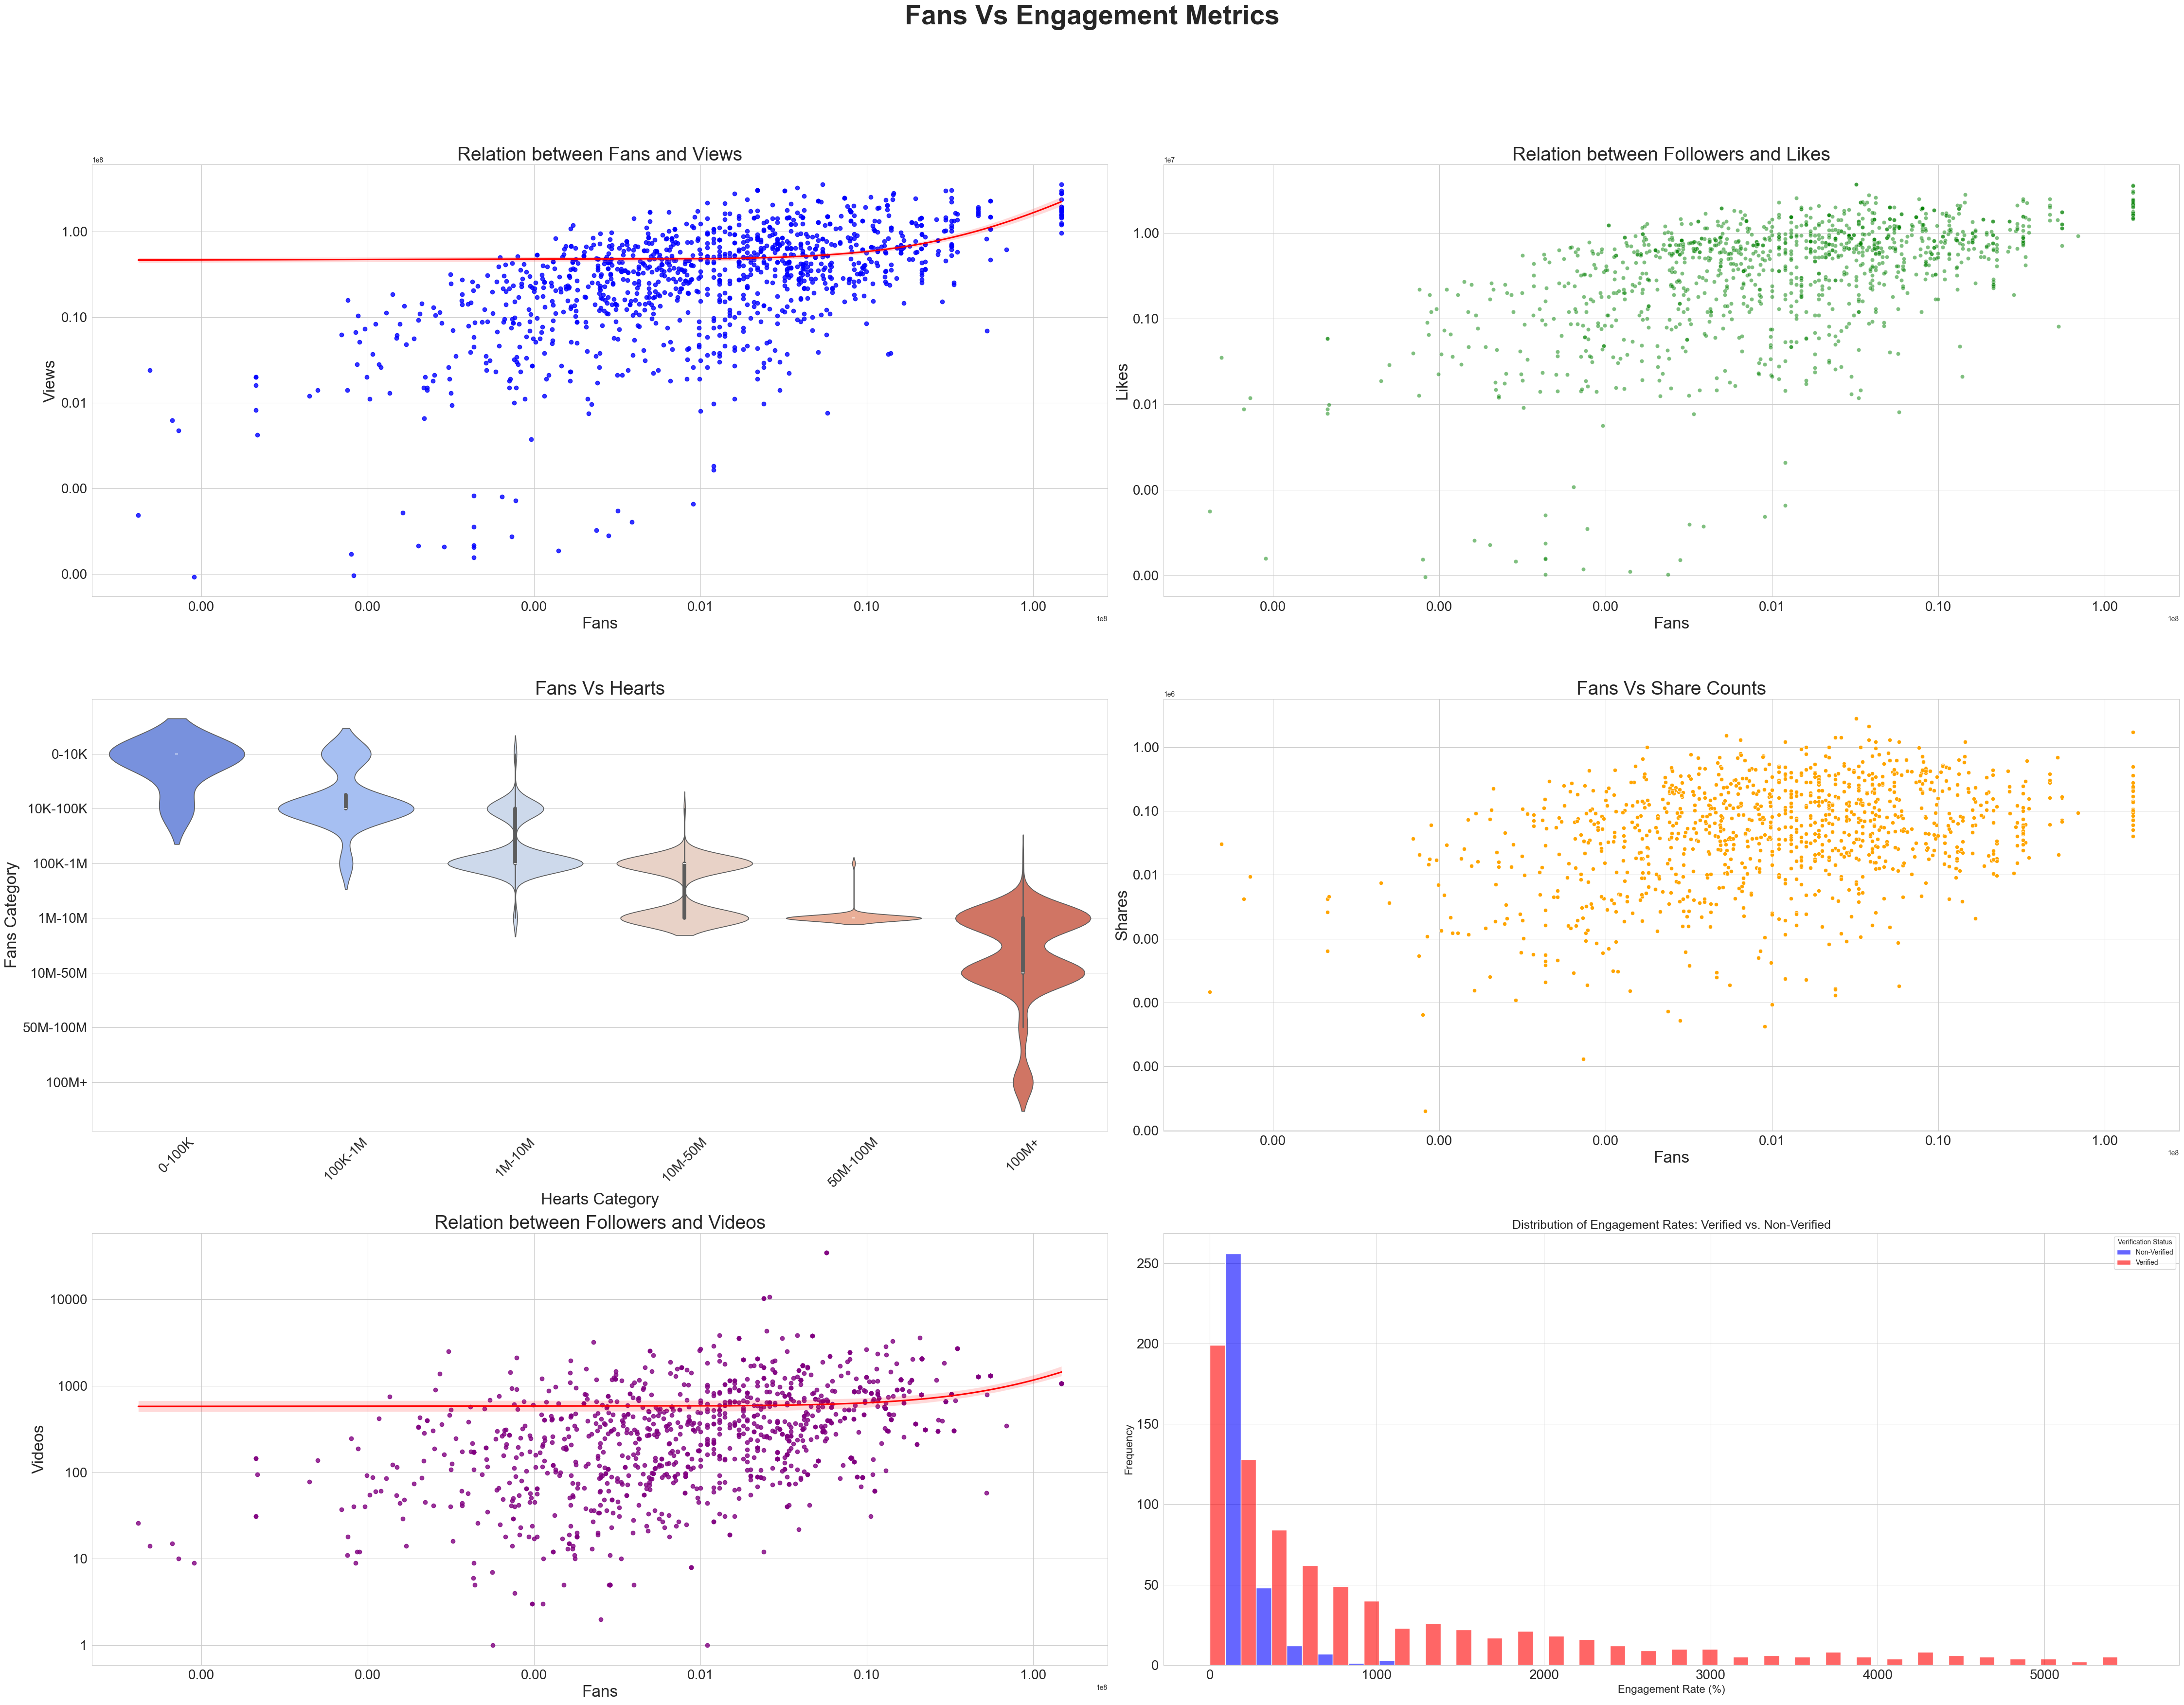

In [4]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(45, 35))
fig.suptitle("Fans Vs Engagement Metrics", fontsize=40, fontweight='bold', y=1.02)

# Fans Vs Views
sns.regplot(x=tiktok_data['authorMeta/fans'], y=tiktok_data['playCount'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, 
            ax=axes[0, 0])
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')
axes[0, 0].set_title('Relation between Fans and Views', fontsize=28)
axes[0, 0].set_xlabel('Fans', fontsize=24)
axes[0, 0].set_ylabel('Views', fontsize=24)


sns.scatterplot(x=tiktok_data['authorMeta/fans'], y=tiktok_data['diggCount'], ax=axes[0, 1], alpha=0.5, color='green')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Relation between Followers and Likes', fontsize=28)
axes[0, 1].set_xlabel('Fans', fontsize=24)
axes[0, 1].set_ylabel('Likes', fontsize=24)

# Fans Vs Hearts
tiktok_data['Fans Category'] = pd.cut(tiktok_data['authorMeta/fans'], bins=[0, 10_000, 100_000, 1_000_000, 10_000_000, 50_000_000, 100_000_000, float("inf")],  
    labels=['0-10K', '10K-100K', '100K-1M', '1M-10M', '10M-50M', '50M-100M', '100M+'], include_lowest=True)

tiktok_data['Hearts Category'] = pd.cut(tiktok_data['authorMeta/heart'], bins=[0, 100_000, 1_000_000, 10_000_000, 50_000_000, 100_000_000, float("inf")],  
            labels=['0-100K', '100K-1M', '1M-10M', '10M-50M', '50M-100M', '100M+'], include_lowest=True)
sns.violinplot(x='Hearts Category', y='Fans Category', data=tiktok_data, palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title('Fans Vs Hearts', fontsize=28)
axes[1, 0].set_xlabel('Hearts Category', fontsize=24)
axes[1, 0].set_ylabel('Fans Category', fontsize=24)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, fontsize=22)

# Fans Vs Shares
sns.scatterplot(x=tiktok_data['authorMeta/fans'], y=tiktok_data['shareCount'], ax=axes[1, 1], alpha=1, color='orange')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Fans Vs Share Counts', fontsize=28)
axes[1, 1].set_xlabel('Fans', fontsize=24)
axes[1, 1].set_ylabel('Shares', fontsize=24)

# Fans Vs Videos
sns.regplot(x=tiktok_data['authorMeta/fans'], y=tiktok_data['authorMeta/video'], scatter_kws={'color': 'purple'}, line_kws={'color': 'red'}, 
            ax=axes[2, 0])
axes[2, 0].set_xscale('log')
axes[2, 0].set_yscale('log')
axes[2, 0].set_title('Relation between Followers and Videos', fontsize=28)
axes[2, 0].set_xlabel('Fans', fontsize=24)
axes[2, 0].set_ylabel('Videos', fontsize=24)

#Verifed and Un-Verified vs Engagement Ratio
# Remove users with 0 fans to avoid division errors
tiktok_data = tiktok_data[tiktok_data['authorMeta/fans'] > 0]

# Calculate Engagement Rate
tiktok_data['Engagement Rate'] = (
    (tiktok_data['diggCount'] + tiktok_data['shareCount'] + tiktok_data['commentCount']) 
    / tiktok_data['authorMeta/fans']
) * 100

# Remove outliers beyond the 95th percentile
upper_limit = np.percentile(tiktok_data['Engagement Rate'], 95)
tiktok_data = tiktok_data[tiktok_data['Engagement Rate'] < upper_limit]

sns.histplot(data=tiktok_data, x='Engagement Rate', hue='authorMeta/verified', hue_order=[False, True], 
                palette=['red', 'blue'], kde=False, bins=30,alpha=0.6, multiple="dodge", ax=axes[2,1])

# Fix Labels
axes[2,1].set_xlabel('Engagement Rate (%)', fontsize=16)
axes[2,1].set_ylabel('Frequency', fontsize=16)
axes[2,1].set_title('Distribution of Engagement Rates: Verified vs. Non-Verified', fontsize=18)
axes[2,1].legend(title="Verification Status", labels=["Non-Verified", "Verified"])

for ax in [axes[0, 0], axes[0, 1], axes[1, 1], axes[2, 0]]:
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(ScalarFormatter())


for ax in axes.flat:
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)


plt.tight_layout(rect=[0, 0.02, 1, 0.96])

plt.show()


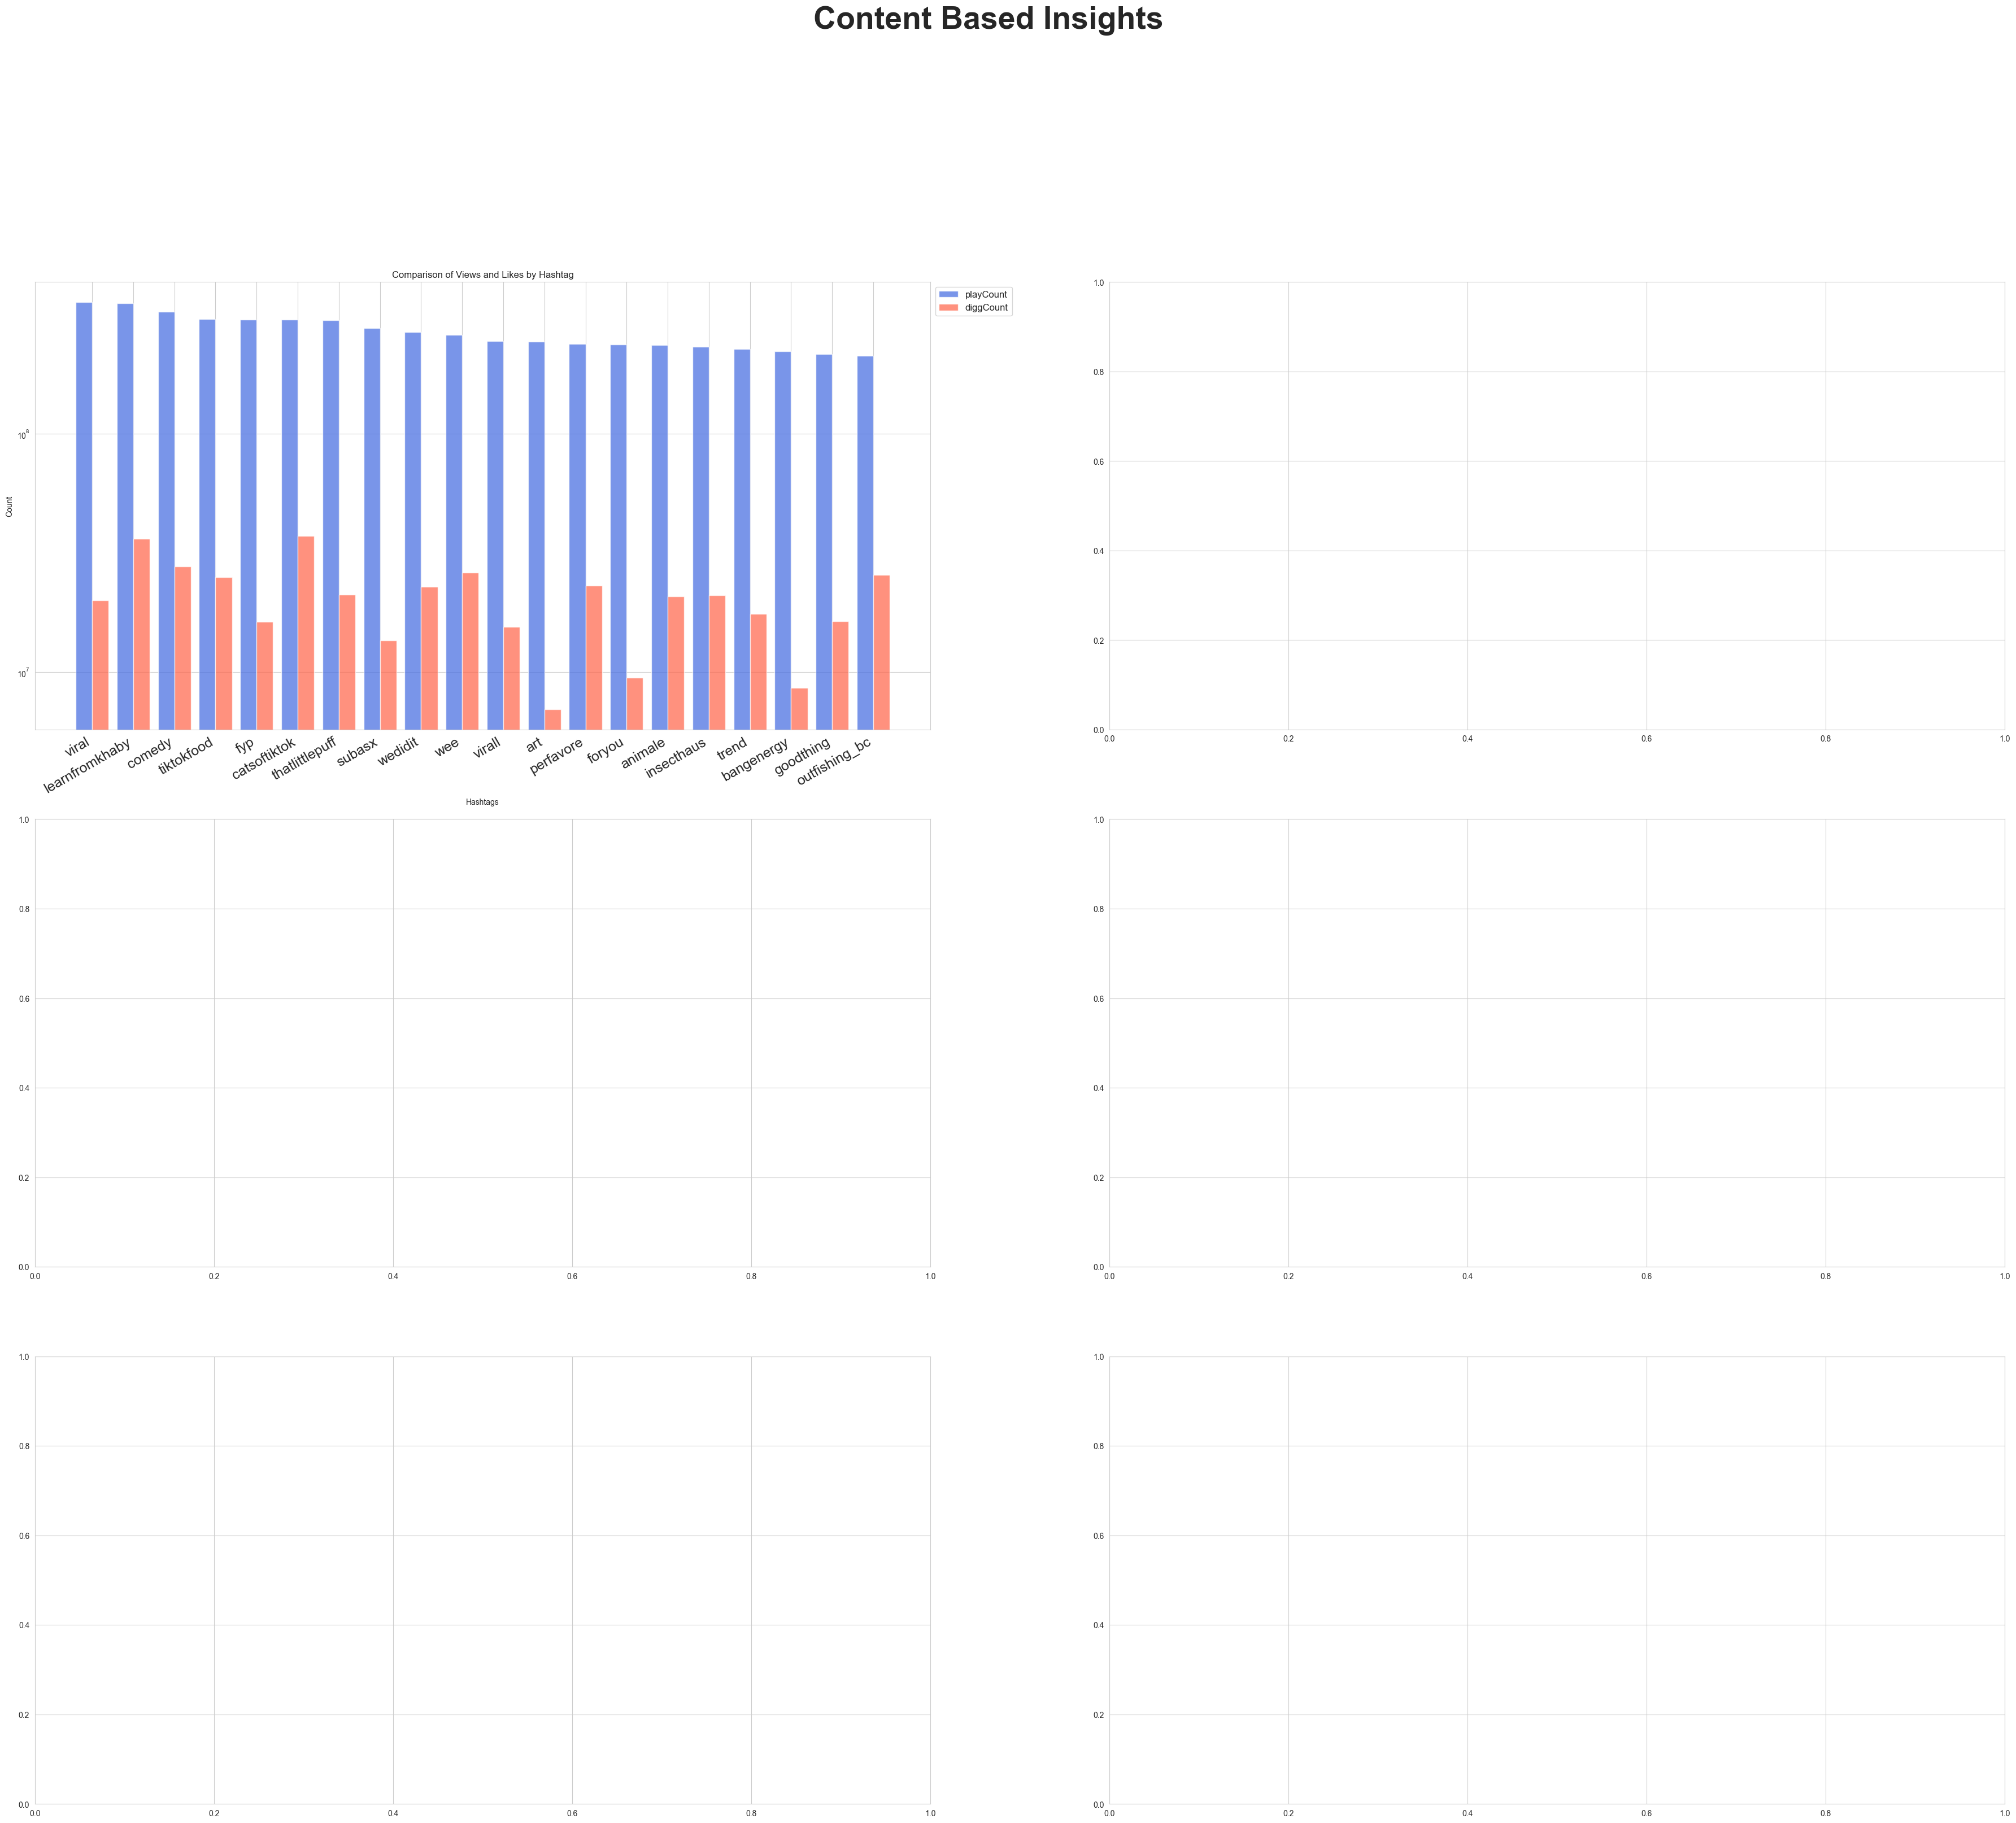

In [ ]:
sns.set_style('whitegrid')
fig , axes = plt.subplots(3,2, figsize=(45,35))
fig.suptitle("Content Based Insights", fontsize=40, fontweight='bold', y=1.02)

# #Hashtag vs like and views
tiktok_data = tiktok_data.rename(columns={'hashtags/0/name': 'hashtag_name'})
tiktok_data['hashtag_name'] = tiktok_data['hashtag_name'].fillna('No Hashtag')
tiktok_data['hashtag_name'] = tiktok_data['hashtag_name'].astype(str)  
tiktok_data['hashtag_name'] = tiktok_data['hashtag_name'].str.lower().str.strip()

tiktok_data = tiktok_data.sort_values(by="playCount", ascending=False).drop_duplicates(subset=["hashtag_name"]).head(20)
bar_width = 0.4

x = range(len(tiktok_data['hashtag_name']))

axes[0,0].bar(x, tiktok_data['playCount'], width=bar_width, label="playCount", color='royalblue', alpha=0.7)
axes[0,0].bar([i + bar_width for i in x], tiktok_data['diggCount'], width=0.4, label="diggCount", color='tomato', alpha=0.7)
axes[0, 0].set_xlabel("Hashtags")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_title("Comparison of Views and Likes by Hashtag")
axes[0, 0].set_xticks([i + bar_width/2 for i in x])
axes[0, 0].set_xticklabels(tiktok_data['hashtag_name'])
axes[0,0].set_xticklabels(tiktok_data['hashtag_name'],rotation=30 ,ha="right",fontsize = 18)  # Increased rotation for readability
axes[0,0].set_yscale("log")
axes[0, 0].legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)


tiktok_data['mentions']=tiktok_data['mentions/0'].apply(lambda x:1 if pd.notna(x) and x!=" " else 0 )
tiktok_data.groupby('mentions')[['diggCount','playCount']].mean()
sns.barplot(x='mentions',y='diggCount',data=tiktok_data,estimator=sum,ci=None)
axes[0,1].set_xlabel("Mentions (0 = No, 1 = Yes)")
axes[0,1].set_ylabel("Total Likes")
axes[0,1].set_title("Total Likes Based on Mentions")
plt.show()

